***
<br><br><br><br><br>
<h1><em>Mirage</em> Data Analysis</h1>
<em>Middle-East & Russia</em><br><br>

Written by <br>
Quentin <br>
Abdul <br>
Lizaveta <br>
Chandan <br>
Enea <br>
Edgar <br><br>
from Hult International Business School <br>
<a href="https://github.com/QuentinAd">github.com/QuentinAd</a> <br><br><br><br><br>
***
***
***

Analysing the countries around the Caspian Sea and the Black Sea.



## Data Import

### Reading xlsx file

In [1]:
##Reading and printing the entire file##

# importing packages
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # data visualization
import seaborn as sns                 # data visualization
import numpy as np                    # math essentials

# specifying a file (must be in the working directory)
file    = 'dataset.xlsx'

# reading the file into Python through pandas
dataset = pd.read_excel(file)


#printing the file
dataset

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.700000,97.091973,99.500000,68.957000,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750000,52.655431,6.528600e+05,9.250468,25.250000,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,19.642000,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617000,47.965907,2.875000e+04,18.879748,59.383000,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.000000,100.000000,100.000000,10.071000,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948000,45.615016,2.381740e+06,NaN,72.052000,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830000,NaN,2.000000e+02,NaN,87.170000,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850000,79.285586,4.700000e+02,NaN,88.150000,-0.495265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,PSE,West Bank,Arabian Peninsula,Wheeljack,100.000000,100.000000,100.000000,52.766000,73.481011,5.367632,...,NaN,NaN,NaN,NaN,24.106000,NaN,6.020000e+03,6.386103,75.894000,2.339809
213,WLD,World,World,Sentinel Prime,88.848638,78.647356,97.357692,42.455699,54.216831,13.216044,...,NaN,0.8,10.8,13.5,45.177758,65.035716,1.320366e+08,15.204328,54.822242,1.985135
214,YEM,Yemen,Arabian Peninsula,Wheeljack,79.200000,68.702845,97.848656,60.352000,74.987414,4.990006,...,NaN,0.1,38.9,NaN,63.984000,19.112768,5.279700e+05,NaN,36.016000,4.166123
215,ZMB,Zambia,East/South Africa,Jazz,40.300000,13.997701,75.200000,120.112000,90.462311,3.970773,...,NaN,11.6,46.7,NaN,57.024000,52.093837,7.526100e+05,15.184871,42.976000,4.211349


### Calculating GDP per Capita

In [2]:
# Calculating GDP per Capita
dataset['GDP per Capita'] = dataset['GDP (current US$)']/dataset['Population, total']
dataset['GDP per Capita'].round(2)

0        556.30
1       4532.89
2       4048.29
3      11398.78
4      39134.39
         ...   
212     3254.49
213    10769.73
214      963.49
215     1534.87
216     1602.40
Name: GDP per Capita, Length: 217, dtype: float64

###  Filtering whole dataset to region of interest

In [3]:
#filtering the dataset to the region of interest
mirage_original = dataset.loc[dataset['Cool Name'] == 'Mirage']

#printing the new file containing only region of interest
mirage_original

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.70,97.091973,99.5,68.957,86.000753,4.750925,...,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407,556.302139
8,ARM,Armenia,Middle East & Russia,Mirage,100.00,100.000000,100.0,21.490,46.094267,16.211562,...,0.2,4.3,NaN,36.897,50.765258,29740.0,20.780653,63.103,0.327886,3914.501268
12,AZE,Azerbaijan,Middle East & Russia,Mirage,100.00,100.000000,100.0,55.838,41.397422,8.469267,...,NaN,2.5,NaN,44.657,38.122460,86600.0,13.164046,55.343,1.564773,4147.089716
17,BLR,Belarus,Middle East & Russia,Mirage,100.00,100.000000,100.0,14.507,45.524421,21.210369,...,0.4,2.5,NaN,21.866,47.633719,207600.0,13.019006,78.134,0.572798,5761.747120
29,BGR,Bulgaria,Middle East & Russia,Mirage,100.00,100.000000,100.0,39.860,54.326551,32.034489,...,0.1,3.6,NaN,25.331,57.992132,111000.0,20.085524,74.669,-0.274061,8228.011570
72,GEO,Georgia,Middle East & Russia,Mirage,100.00,100.000000,100.0,46.408,51.981795,22.301103,...,0.4,7.9,NaN,41.769,57.632390,69700.0,23.757220,58.231,0.692304,4045.417050
91,IRN,Iran,Middle East & Russia,Mirage,100.00,100.000000,100.0,40.635,43.444339,8.662181,...,0.1,4.9,NaN,25.606,54.352931,1745150.0,NaN,74.394,2.078694,5627.749268
130,MDA,Moldova,Middle East & Russia,Mirage,100.00,100.000000,100.0,22.415,36.472685,14.888082,...,0.6,NaN,NaN,57.443,53.199294,33850.0,17.442612,42.557,0.030460,2724.493093
149,PAK,Pakistan,Middle East & Russia,Mirage,70.79,54.136832,100.0,38.802,66.092146,7.164943,...,0.1,20.3,NaN,63.558,53.092404,796100.0,NaN,36.442,2.647402,1466.843096
160,ROU,Romania,Middle East & Russia,Mirage,100.00,100.000000,100.0,36.211,49.995225,26.821739,...,0.1,2.5,NaN,46.064,56.832705,238400.0,15.460767,53.936,-0.517819,10792.956280


## Anomaly Detection and Treatment

### Creating copy of original file

In [4]:
#saving a copy of the original region file to work on
mirage = pd.DataFrame.copy(mirage_original)

#printing the new working dataset
mirage

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.70,97.091973,99.5,68.957,86.000753,4.750925,...,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407,556.302139
8,ARM,Armenia,Middle East & Russia,Mirage,100.00,100.000000,100.0,21.490,46.094267,16.211562,...,0.2,4.3,NaN,36.897,50.765258,29740.0,20.780653,63.103,0.327886,3914.501268
12,AZE,Azerbaijan,Middle East & Russia,Mirage,100.00,100.000000,100.0,55.838,41.397422,8.469267,...,NaN,2.5,NaN,44.657,38.122460,86600.0,13.164046,55.343,1.564773,4147.089716
17,BLR,Belarus,Middle East & Russia,Mirage,100.00,100.000000,100.0,14.507,45.524421,21.210369,...,0.4,2.5,NaN,21.866,47.633719,207600.0,13.019006,78.134,0.572798,5761.747120
29,BGR,Bulgaria,Middle East & Russia,Mirage,100.00,100.000000,100.0,39.860,54.326551,32.034489,...,0.1,3.6,NaN,25.331,57.992132,111000.0,20.085524,74.669,-0.274061,8228.011570
72,GEO,Georgia,Middle East & Russia,Mirage,100.00,100.000000,100.0,46.408,51.981795,22.301103,...,0.4,7.9,NaN,41.769,57.632390,69700.0,23.757220,58.231,0.692304,4045.417050
91,IRN,Iran,Middle East & Russia,Mirage,100.00,100.000000,100.0,40.635,43.444339,8.662181,...,0.1,4.9,NaN,25.606,54.352931,1745150.0,NaN,74.394,2.078694,5627.749268
130,MDA,Moldova,Middle East & Russia,Mirage,100.00,100.000000,100.0,22.415,36.472685,14.888082,...,0.6,NaN,NaN,57.443,53.199294,33850.0,17.442612,42.557,0.030460,2724.493093
149,PAK,Pakistan,Middle East & Russia,Mirage,70.79,54.136832,100.0,38.802,66.092146,7.164943,...,0.1,20.3,NaN,63.558,53.092404,796100.0,NaN,36.442,2.647402,1466.843096
160,ROU,Romania,Middle East & Russia,Mirage,100.00,100.000000,100.0,36.211,49.995225,26.821739,...,0.1,2.5,NaN,46.064,56.832705,238400.0,15.460767,53.936,-0.517819,10792.956280


### Cleaning working file

In [5]:
#indexing file according to country code
mirage = mirage.set_index('Country Code')

In [6]:
#Testing for unique values in following columns
print(mirage['Cool Name'].unique())
print(mirage['Hult Region'].unique())

['Mirage']
['Middle East & Russia']


In [7]:
#deleting columns with unique values
del mirage['Cool Name'], mirage['Hult Region']

#printing the working file without the unnecessary columns
mirage

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,97.70,97.091973,99.5,68.957,86.000753,4.750925,81.249828,20.466505,2.398332,...,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407,556.302139
ARM,Armenia,100.00,100.000000,100.0,21.490,46.094267,16.211562,29.882705,14.994260,3.567089,...,0.2,4.3,NaN,36.897,50.765258,29740.0,20.780653,63.103,0.327886,3914.501268
AZE,Azerbaijan,100.00,100.000000,100.0,55.838,41.397422,8.469267,32.928155,5.607369,1.629629,...,NaN,2.5,NaN,44.657,38.122460,86600.0,13.164046,55.343,1.564773,4147.089716
BLR,Belarus,100.00,100.000000,100.0,14.507,45.524421,21.210369,24.314053,7.565803,3.062432,...,0.4,2.5,NaN,21.866,47.633719,207600.0,13.019006,78.134,0.572798,5761.747120
BGR,Bulgaria,100.00,100.000000,100.0,39.860,54.326551,32.034489,22.292063,4.071158,0.923333,...,0.1,3.6,NaN,25.331,57.992132,111000.0,20.085524,74.669,-0.274061,8228.011570
GEO,Georgia,100.00,100.000000,100.0,46.408,51.981795,22.301103,29.680692,6.884899,1.284939,...,0.4,7.9,NaN,41.769,57.632390,69700.0,23.757220,58.231,0.692304,4045.417050
IRN,Iran,100.00,100.000000,100.0,40.635,43.444339,8.662181,34.782159,9.499743,2.082451,...,0.1,4.9,NaN,25.606,54.352931,1745150.0,NaN,74.394,2.078694,5627.749268
MDA,Moldova,100.00,100.000000,100.0,22.415,36.472685,14.888082,21.584603,11.472258,0.553204,...,0.6,NaN,NaN,57.443,53.199294,33850.0,17.442612,42.557,0.030460,2724.493093
PAK,Pakistan,70.79,54.136832,100.0,38.802,66.092146,7.164943,58.927203,22.880888,1.312252,...,0.1,20.3,NaN,63.558,53.092404,796100.0,NaN,36.442,2.647402,1466.843096


### Adding new columns

In [8]:
#adding new column for subregions
mirage['Subregion'] = ['ME' if x == 'Pakistan' or x == 'Iran' or x == 'Afghanistan' else 'PS' for x in mirage['Country Name']]

#setting type of new column to category
mirage['Subregion'] = mirage['Subregion'].astype('category')

#printing the new column
print(mirage['Subregion'])

Country Code
AFG    ME
ARM    PS
AZE    PS
BLR    PS
BGR    PS
GEO    PS
IRN    ME
MDA    PS
PAK    ME
ROU    PS
RUS    PS
TKM    PS
UKR    PS
UZB    PS
Name: Subregion, dtype: category
Categories (2, object): [ME, PS]


In [9]:
#Looking for changed data type in subregion column
mirage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, AFG to UZB
Data columns (total 66 columns):
Country Name                                                                                                  14 non-null object
Access to electricity (% of population)                                                                       14 non-null float64
Access to electricity, rural (% of rural population)                                                          14 non-null float64
Access to electricity, urban (% of urban population)                                                          14 non-null float64
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                 14 non-null float64
Age dependency ratio (% of working-age population)                                                            14 non-null float64
Age dependency ratio, old (% of working-age population)                                                       14 non-nul

### Missing Data

#### Missing Data Detection

In [10]:
#printing the number of missing values per columns
for col in mirage:
    if mirage[col].isnull().astype(int).sum() > 0:
        print(col)
        print(mirage[col].isnull().astype(int).sum())
    

Agriculture, forestry, and fishing, value added (% of GDP)
1
Births attended by skilled health staff (% of total)
14
Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)
14
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)
14
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)
14
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)
14
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)
14
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)
14
Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)
14
Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)
14
GINI index (World Bank estimate)
10
Government expenditure on education, total (%

#### Filtering working file to columns of interest

In [11]:
#printing all column names
mirage.columns

Index(['Country Name', 'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Armed forces personnel (% of total labor force)',
       'Birth rate, crude (per 1,000 people)',
       'Births attended by skilled health staff (% of total)',
       'Death rate, crude (per 1,000 people)',
       'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)',
       'Educational attainment, at least Master's or

#### Flagging missing values

In [12]:
#loop creating a new dataset flagging missing data by columns
mirage_missing = pd.DataFrame()
for col in mirage:  
    if mirage[col].isnull().astype(int).sum() > 0:
        mirage_missing['m_'+col] = mirage[col].isnull().astype(int)
        
#printing the new dataset showing missing values        
mirage_missing

,"m_Agriculture, forestry, and fishing, value added (% of GDP)",m_Births attended by skilled health staff (% of total),"m_Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","m_Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","m_Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","m_Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","m_Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","m_Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","m_Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","m_Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",...,"m_Literacy rate, youth total (% of people ages 15-24)",m_Military expenditure (% of GDP),m_Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),m_Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),m_Poverty headcount ratio at national poverty lines (% of population),"m_Prevalence of HIV, total (% of population ages 15-49)",m_Prevalence of undernourishment (% of population),"m_Prevalence of underweight, weight for age (% of children under 5)","m_Services, value added (% of GDP)",m_Tax revenue (% of GDP)
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,0,0
ARM,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0
AZE,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,0
BLR,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,1,0,0
BGR,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,1,0,0
GEO,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0
IRN,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,0,1
MDA,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,1,1,0,0
PAK,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,0,1,0,1


In [13]:
#filtering mirage dataset to dataset with only columns of interest
mirage_filtered = mirage[[
    'Country Name',
    'Access to electricity (% of population)',
    'Access to electricity, rural (% of rural population)',
    'Age dependency ratio (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)',
    'Age dependency ratio, young (% of working-age population)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Armed forces personnel (% of total labor force)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Fertility rate, total (births per woman)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GINI index (World Bank estimate)',
    'Government expenditure on education, total (% of government expenditure)',
    'Industry (including construction), value added (% of GDP)',
    'Life expectancy at birth, total (years)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Merchandise trade (% of GDP)',
    'Military expenditure (% of GDP)',
    'Mobile cellular subscriptions (per 100 people)',
    'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)','Population ages 65 and above (% of total population)',
    'Population density (people per sq. km of land area)',
    'Population growth (annual %)',
    'Population in the largest city (% of urban population)',
    'Population living in slums (% of urban population)',
    'Population, female',
    'Population, male',
    'Population, total',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Prevalence of undernourishment (% of population)',
    'Rural population (% of total population)',
    'Services, value added (% of GDP)', 'Surface area (sq. km)',
    'Tax revenue (% of GDP)', 'Urban population (% of total population)',
    'Urban population growth (annual %)',
    'GDP per Capita',
    'Subregion'
]]

In [14]:
#printing new mirage with columns of interest
mirage_filtered

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP per Capita,Subregion
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,97.70,97.091973,86.000753,4.750925,81.249828,20.466505,2.398332,33.211,6.575,...,0.1,29.8,74.750,52.655431,652860.0,9.250468,25.250,3.463407,556.302139,ME
ARM,Armenia,100.00,100.000000,46.094267,16.211562,29.882705,14.994260,3.567089,14.298,9.862,...,0.2,4.3,36.897,50.765258,29740.0,20.780653,63.103,0.327886,3914.501268,PS
AZE,Azerbaijan,100.00,100.000000,41.397422,8.469267,32.928155,5.607369,1.629629,14.600,5.800,...,NaN,2.5,44.657,38.122460,86600.0,13.164046,55.343,1.564773,4147.089716,PS
BLR,Belarus,100.00,100.000000,45.524421,21.210369,24.314053,7.565803,3.062432,10.800,12.600,...,0.4,2.5,21.866,47.633719,207600.0,13.019006,78.134,0.572798,5761.747120,PS
BGR,Bulgaria,100.00,100.000000,54.326551,32.034489,22.292063,4.071158,0.923333,9.000,15.500,...,0.1,3.6,25.331,57.992132,111000.0,20.085524,74.669,-0.274061,8228.011570,PS
GEO,Georgia,100.00,100.000000,51.981795,22.301103,29.680692,6.884899,1.284939,13.718,12.918,...,0.4,7.9,41.769,57.632390,69700.0,23.757220,58.231,0.692304,4045.417050,PS
IRN,Iran,100.00,100.000000,43.444339,8.662181,34.782159,9.499743,2.082451,19.011,4.835,...,0.1,4.9,25.606,54.352931,1745150.0,NaN,74.394,2.078694,5627.749268,ME
MDA,Moldova,100.00,100.000000,36.472685,14.888082,21.584603,11.472258,0.553204,10.274,11.528,...,0.6,NaN,57.443,53.199294,33850.0,17.442612,42.557,0.030460,2724.493093,PS
PAK,Pakistan,70.79,54.136832,66.092146,7.164943,58.927203,22.880888,1.312252,28.599,6.994,...,0.1,20.3,63.558,53.092404,796100.0,NaN,36.442,2.647402,1466.843096,ME


#### Missing Data Treatment - Imputation

In [15]:
#imputing missing data with data from external sources
mirage_filtered.loc['TKM','Military expenditure (% of GDP)'] = 2.9
mirage_filtered.loc['UZB','Military expenditure (% of GDP)'] = 3.55

mirage_filtered.loc['AZE','Prevalence of HIV, total (% of population ages 15-49)'] = 0.1
mirage_filtered.loc['RUS','Prevalence of HIV, total (% of population ages 15-49)'] = 1.2

mirage_filtered.loc['IRN','Tax revenue (% of GDP)'] = 7.359
mirage_filtered.loc['PAK','Tax revenue (% of GDP)'] = 9.988
mirage_filtered.loc['TKM','Tax revenue (% of GDP)'] = 10.60

mirage_filtered.loc['ARM','Government expenditure on education, total (% of government expenditure)'] = 10.4
mirage_filtered.loc['AZE','Government expenditure on education, total (% of government expenditure)'] = 6.95
mirage_filtered.loc['BGR','Government expenditure on education, total (% of government expenditure)'] = 12.28
mirage_filtered.loc['ROU','Government expenditure on education, total (% of government expenditure)'] = 9.09
mirage_filtered.loc['RUS','Government expenditure on education, total (% of government expenditure)'] = 10.99
mirage_filtered.loc['TKM','Government expenditure on education, total (% of government expenditure)'] = 20.80
mirage_filtered.loc['UKR','Government expenditure on education, total (% of government expenditure)'] = 13.67

mirage_filtered.loc['AFG','Literacy rate, adult total (% of people ages 15 and above)'] = 42.02
mirage_filtered.loc['ARM','Literacy rate, adult total (% of people ages 15 and above)'] = 99.74
mirage_filtered.loc['AZE','Literacy rate, adult total (% of people ages 15 and above)'] = 99.79
mirage_filtered.loc['BLR','Literacy rate, adult total (% of people ages 15 and above)'] = 99.76
mirage_filtered.loc['BGR','Literacy rate, adult total (% of people ages 15 and above)'] = 98.35
mirage_filtered.loc['GEO','Literacy rate, adult total (% of people ages 15 and above)'] = 99.36
mirage_filtered.loc['IRN','Literacy rate, adult total (% of people ages 15 and above)'] = 85.54
mirage_filtered.loc['MDA','Literacy rate, adult total (% of people ages 15 and above)'] = 99.36
mirage_filtered.loc['PAK','Literacy rate, adult total (% of people ages 15 and above)'] = 59.13
mirage_filtered.loc['ROU','Literacy rate, adult total (% of people ages 15 and above)'] = 98.84
mirage_filtered.loc['RUS','Literacy rate, adult total (% of people ages 15 and above)'] = 99.73
mirage_filtered.loc['TKM','Literacy rate, adult total (% of people ages 15 and above)'] = 99.70
mirage_filtered.loc['UKR','Literacy rate, adult total (% of people ages 15 and above)'] = 99.97
mirage_filtered.loc['UZB','Literacy rate, adult total (% of people ages 15 and above)'] = 99.99

mirage_filtered.loc['AFG','Literacy rate, youth total (% of people ages 15-24)'] = 65.42
mirage_filtered.loc['ARM','Literacy rate, youth total (% of people ages 15-24)'] = 99.85
mirage_filtered.loc['AZE','Literacy rate, youth total (% of people ages 15-24)'] = 99.94
mirage_filtered.loc['BLR','Literacy rate, youth total (% of people ages 15-24)'] = 99.85
mirage_filtered.loc['BGR','Literacy rate, youth total (% of people ages 15-24)'] = 97.87
mirage_filtered.loc['GEO','Literacy rate, youth total (% of people ages 15-24)'] = 99.64
mirage_filtered.loc['IRN','Literacy rate, youth total (% of people ages 15-24)'] = 98.10
mirage_filtered.loc['MDA','Literacy rate, youth total (% of people ages 15-24)'] = 99.81
mirage_filtered.loc['PAK','Literacy rate, youth total (% of people ages 15-24)'] = 74.53
mirage_filtered.loc['ROU','Literacy rate, youth total (% of people ages 15-24)'] = 99.43
mirage_filtered.loc['RUS','Literacy rate, youth total (% of people ages 15-24)'] = 99.70
mirage_filtered.loc['TKM','Literacy rate, youth total (% of people ages 15-24)'] = 99.80
mirage_filtered.loc['UKR','Literacy rate, youth total (% of people ages 15-24)'] = 99.97
mirage_filtered.loc['UZB','Literacy rate, youth total (% of people ages 15-24)'] = 100

mirage_filtered.loc['AZE','GINI index (World Bank estimate)'] = 26.60
mirage_filtered.loc['BGR','GINI index (World Bank estimate)'] = 34.30
mirage_filtered.loc['IRN','GINI index (World Bank estimate)'] = 42.1
mirage_filtered.loc['PAK','GINI index (World Bank estimate)'] = 30.9
mirage_filtered.loc['ROU','GINI index (World Bank estimate)'] = 35.9
mirage_filtered.loc['RUS','GINI index (World Bank estimate)'] = 39.7
mirage_filtered.loc['UKR','GINI index (World Bank estimate)'] = 24.6
mirage_filtered.loc['UZB','GINI index (World Bank estimate)'] = 35.3


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
#printing the 'data sources' imputed dataset
mirage_filtered

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP per Capita,Subregion
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,97.70,97.091973,86.000753,4.750925,81.249828,20.466505,2.398332,33.211,6.575,...,0.1,29.8,74.750,52.655431,652860.0,9.250468,25.250,3.463407,556.302139,ME
ARM,Armenia,100.00,100.000000,46.094267,16.211562,29.882705,14.994260,3.567089,14.298,9.862,...,0.2,4.3,36.897,50.765258,29740.0,20.780653,63.103,0.327886,3914.501268,PS
AZE,Azerbaijan,100.00,100.000000,41.397422,8.469267,32.928155,5.607369,1.629629,14.600,5.800,...,0.1,2.5,44.657,38.122460,86600.0,13.164046,55.343,1.564773,4147.089716,PS
BLR,Belarus,100.00,100.000000,45.524421,21.210369,24.314053,7.565803,3.062432,10.800,12.600,...,0.4,2.5,21.866,47.633719,207600.0,13.019006,78.134,0.572798,5761.747120,PS
BGR,Bulgaria,100.00,100.000000,54.326551,32.034489,22.292063,4.071158,0.923333,9.000,15.500,...,0.1,3.6,25.331,57.992132,111000.0,20.085524,74.669,-0.274061,8228.011570,PS
GEO,Georgia,100.00,100.000000,51.981795,22.301103,29.680692,6.884899,1.284939,13.718,12.918,...,0.4,7.9,41.769,57.632390,69700.0,23.757220,58.231,0.692304,4045.417050,PS
IRN,Iran,100.00,100.000000,43.444339,8.662181,34.782159,9.499743,2.082451,19.011,4.835,...,0.1,4.9,25.606,54.352931,1745150.0,7.359000,74.394,2.078694,5627.749268,ME
MDA,Moldova,100.00,100.000000,36.472685,14.888082,21.584603,11.472258,0.553204,10.274,11.528,...,0.6,NaN,57.443,53.199294,33850.0,17.442612,42.557,0.030460,2724.493093,PS
PAK,Pakistan,70.79,54.136832,66.092146,7.164943,58.927203,22.880888,1.312252,28.599,6.994,...,0.1,20.3,63.558,53.092404,796100.0,9.988000,36.442,2.647402,1466.843096,ME


In [17]:
#printing the number of missing values per columns
for col in mirage_filtered:
    if mirage_filtered[col].isnull().astype(int).sum() > 0:
        print(col)
        print(mirage_filtered[col].isnull().astype(int).sum())

Agriculture, forestry, and fishing, value added (% of GDP)
1
GINI index (World Bank estimate)
2
Industry (including construction), value added (% of GDP)
1
Prevalence of HIV, total (% of population ages 15-49)
1
Prevalence of undernourishment (% of population)
1
Services, value added (% of GDP)
1


### Imputing the missing values with the mean

In [18]:
# soft coding measures of center
agriculture_mean = mirage_filtered['Agriculture, forestry, and fishing, value added (% of GDP)'].mean()
gini_mean = mirage_filtered['GINI index (World Bank estimate)'].mean()
industry_mean = mirage_filtered['Industry (including construction), value added (% of GDP)'].mean()
hiv_mean = mirage_filtered['Prevalence of HIV, total (% of population ages 15-49)'].mean()
undernou_mean = mirage_filtered['Prevalence of undernourishment (% of population)'].mean()
services_mean = mirage_filtered['Services, value added (% of GDP)'].mean()


In [19]:
# filling NAs
mirage_filtered['Agriculture, forestry, and fishing, value added (% of GDP)'] = mirage_filtered['Agriculture, forestry, and fishing, value added (% of GDP)'].fillna(agriculture_mean).round(2)
mirage_filtered['GINI index (World Bank estimate)']                           = mirage_filtered['GINI index (World Bank estimate)'].fillna(gini_mean).round(2)
mirage_filtered['Industry (including construction), value added (% of GDP)']  = mirage_filtered['Industry (including construction), value added (% of GDP)'].fillna(industry_mean).round(2)
mirage_filtered['Prevalence of HIV, total (% of population ages 15-49)']      = mirage_filtered['Prevalence of HIV, total (% of population ages 15-49)'].fillna(hiv_mean).round(2)
mirage_filtered['Prevalence of undernourishment (% of population)']           = mirage_filtered['Prevalence of undernourishment (% of population)'].fillna(undernou_mean).round(2)
mirage_filtered['Services, value added (% of GDP)']                           = mirage_filtered['Services, value added (% of GDP)'].fillna(services_mean).round(2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [20]:
#Checking to see if all our missing values are unaccounted for 

# checking to see if the new solution worked
print(mirage_filtered.info(null_counts = True,
                           verbose     = False))


a = mirage_filtered.isnull().sum().sum()

if a == 0:
    print('\nAll missing values accounted for.')
else:
    print('\nSome missing values may be unaccounted for, please audit.')

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, AFG to UZB
Columns: 46 entries, Country Name to Subregion
dtypes: category(1), float64(44), object(1)
memory usage: 5.8+ KB
None

All missing values accounted for.


In [21]:
# Separating chosen columns for the easier analysis
mirage_economy = mirage_filtered[[  
    'Country Name',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GINI index (World Bank estimate)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)', 
    'Military expenditure (% of GDP)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Tax revenue (% of GDP)', 
    'Merchandise trade (% of GDP)',
    'GDP per Capita',
    'Subregion'
]]


mirage_population = mirage_filtered[[
    'Country Name',
    'Population, total',
    'Population, female',
    'Population, male',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'Age dependency ratio (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)',
    'Age dependency ratio, young (% of working-age population)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Population ages 65 and above (% of total population)',
    'Population density (people per sq. km of land area)',
    'Population in the largest city (% of urban population)',
    'Population living in slums (% of urban population)',
    'Rural population (% of total population)',
    'Urban population (% of total population)',
    'Urban population growth (annual %)',
    'Subregion'
]]


mirage_education = mirage_filtered[[
    'Country Name',
    'Government expenditure on education, total (% of government expenditure)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Subregion'
]]


mirage_infrastructure = mirage_filtered[[
    'Country Name',
    'Access to electricity (% of population)',
    'Access to electricity, rural (% of rural population)',
    'Mobile cellular subscriptions (per 100 people)',
    'Subregion'
]]


mirage_employment = mirage_filtered[[
    'Country Name',
    'Armed forces personnel (% of total labor force)',
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Subregion'
]]


mirage_health = mirage_filtered[[
    'Country Name',
    'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Prevalence of undernourishment (% of population)',
    'Subregion'
]]


In [22]:
#Checking new Data Frames

mirage_economy


,Country Name,GDP (current US$),GDP growth (annual %),GINI index (World Bank estimate),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Military expenditure (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)",Tax revenue (% of GDP),Merchandise trade (% of GDP),GDP per Capita,Subregion
Country Code,,,,,,,,,,,,
AFG,Afghanistan,2.019176e+10,2.665292,32.68,22.13,52.66,0.943963,20.47,9.250468,41.403018,556.302139,ME
ARM,Armenia,1.152746e+10,7.500000,33.60,25.81,50.77,3.839826,14.99,20.780653,55.814558,3914.501268,PS
AZE,Azerbaijan,4.086556e+10,-0.282011,26.60,49.70,38.12,3.847315,5.61,13.164046,59.360500,4147.089716,PS
BLR,Belarus,5.472660e+10,2.532184,25.40,31.55,47.63,1.162417,7.57,13.019006,115.985655,5761.747120,PS
BGR,Bulgaria,5.822097e+10,3.811248,34.30,24.67,57.99,1.421706,4.07,20.085524,112.710241,8228.011570,PS
GEO,Georgia,1.508133e+10,4.832686,37.90,22.64,57.63,2.032071,6.88,23.757220,70.782877,4045.417050,PS
IRN,Iran,4.540128e+11,3.755187,42.10,34.91,54.35,3.105184,9.50,7.359000,31.334581,5627.749268,ME
MDA,Moldova,9.669760e+09,4.690793,25.90,21.87,53.20,0.375067,11.47,17.442612,75.038057,2724.493093,PS
PAK,Pakistan,3.049518e+11,5.700621,30.90,17.94,53.09,3.766192,22.88,9.988000,26.009027,1466.843096,ME


## Data Analysis (Liz - Economy & Population)

### Position in the World

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:393: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:394: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X <

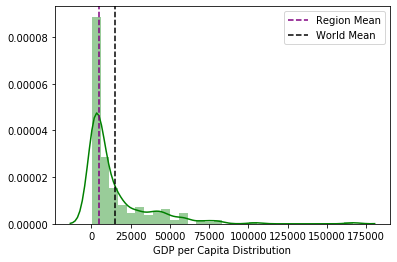

In [23]:
# Building a histogram for the GDP per Capita to compare it with Region mean


mirage_gdppc_mean = mirage_economy['GDP per Capita'].mean()
dataset_gdppc_mean = dataset['GDP per Capita'].mean()

sns.distplot(dataset['GDP per Capita'],
             bins = 'fd',
             color = 'g',)


# labeling axis
plt.xlabel('GDP per Capita Distribution')


# outlier thresholds
plt.axvline(x = mirage_gdppc_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_gdppc_mean,
           label = 'World Mean',
            linestyle = '--',
            color = 'black')

plt.legend()
plt.show()

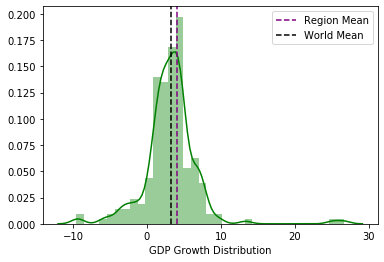

In [24]:
# Building a histogram for the GDP growth to compare it with Region mean

mirage_gdpgrowth_mean = mirage_economy['GDP growth (annual %)'].mean()
dataset_gdpgrowth_mean = dataset['GDP growth (annual %)'].mean()

sns.distplot(dataset['GDP growth (annual %)'],
             bins = 'fd',
             color = 'g')


# labeling axis
plt.xlabel('GDP Growth Distribution')


# outlier thresholds
plt.axvline(x = mirage_gdpgrowth_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_gdpgrowth_mean,
           label = 'World Mean',
            linestyle = '--',
            color = 'black')

plt.legend()
plt.show()

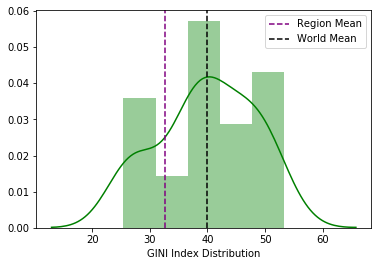

In [25]:
# Building a histogram for the GINI Index to compare it with Region mean

mirage_gini_mean = mirage_economy['GINI index (World Bank estimate)'].mean()
dataset_gini_mean = dataset['GINI index (World Bank estimate)'].mean()

sns.distplot(dataset['GINI index (World Bank estimate)'],
             bins = 'fd',
             color = 'g')


# labeling axis
plt.xlabel('GINI Index Distribution')


# outlier thresholds
plt.axvline(x = mirage_gini_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_gini_mean,
           label = 'World Mean',
            linestyle = '--',
            color = 'black')

plt.legend()
plt.show()

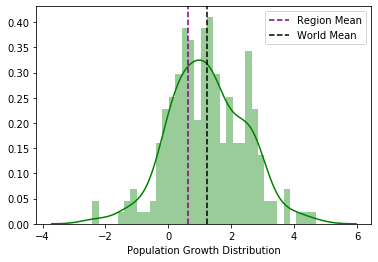

In [26]:
#Building a histogram for the Population Growth to compare it with Region mean
mirage_popgrowth_mean = mirage_population['Population growth (annual %)'].mean()
dataset_popgrowth_mean = dataset['Population growth (annual %)'].mean()

sns.distplot(dataset['Population growth (annual %)'],
             bins = 35,
             color = 'g')


# labeling axis
plt.xlabel('Population Growth Distribution')


# outlier thresholds
plt.axvline(x = mirage_popgrowth_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_popgrowth_mean,
           label = 'World Mean',
           linestyle = '--',
           color = 'black')

plt.legend()
plt.show()


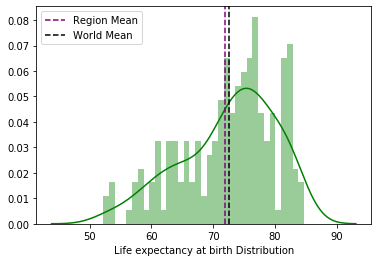

In [27]:
# Building a histogram for the Life Expectancy to compare it with Region mean

mirage_lifeexp_mean = mirage_population['Life expectancy at birth, total (years)'].mean()
dataset_lifeexp_mean = dataset['Life expectancy at birth, total (years)'].mean()

sns.distplot(dataset['Life expectancy at birth, total (years)'],
             bins = 35,
             color = 'g')


# labeling axis
plt.xlabel('Life expectancy at birth Distribution')


# outlier thresholds
plt.axvline(x = mirage_lifeexp_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_lifeexp_mean,
           label = 'World Mean',
           linestyle = '--',
           color = 'black')

plt.legend()
plt.show()


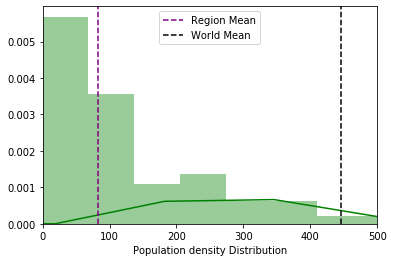

In [28]:
#Building a histogram for the Population Density to compare it with Region mean

mirage_popdens_mean = mirage_population['Population density (people per sq. km of land area)'].mean()
dataset_popdens_mean = dataset['Population density (people per sq. km of land area)'].mean()

sns.distplot(dataset['Population density (people per sq. km of land area)'],
             bins = 300,
             color = 'g')
plt.xlim(0, 500)


# labeling axis
plt.xlabel('Population density Distribution')


# outlier thresholds
plt.axvline(x = mirage_popdens_mean,
            label = 'Region Mean',
            linestyle = '--',
            color = 'purple')

plt.axvline(x = dataset_popdens_mean,
           label = 'World Mean',
           linestyle = '--',
           color = 'black')

plt.legend()
plt.show()

In [29]:
#Calling describe function on Population dencity because histogram looks wierd.
dataset['Population density (people per sq. km of land area)'].describe()

count      214.000000
mean       446.058103
std       2044.917279
min          0.136852
25%         38.281732
50%         93.107795
75%        218.477700
max      20479.769994
Name: Population density (people per sq. km of land area), dtype: float64

### Outliers

#### Outliers Economy

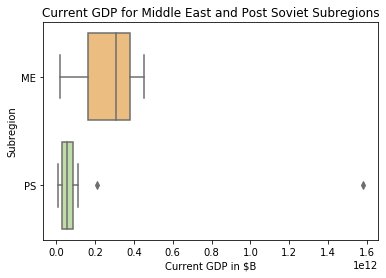

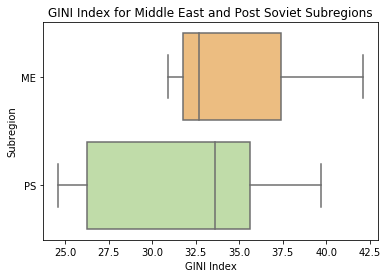

In [30]:
#Boxplots for the GDP, and GINI by Subregions
sns.boxplot(y='Subregion', x='GDP (current US$)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Current GDP for Middle East and Post Soviet Subregions', 
            xlabel = 'Current GDP in $B',
            ylabel = 'Subregion')

plt.show()

sns.boxplot(y='Subregion', x='GINI index (World Bank estimate)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'GINI Index for Middle East and Post Soviet Subregions', 
            xlabel = 'GINI Index',
            ylabel = 'Subregion')

plt.show()


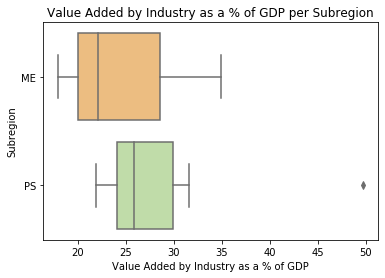

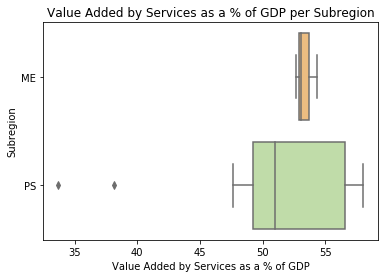

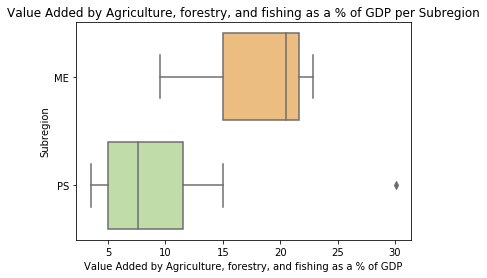

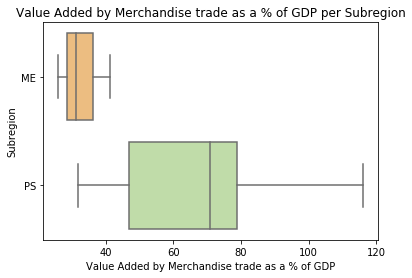

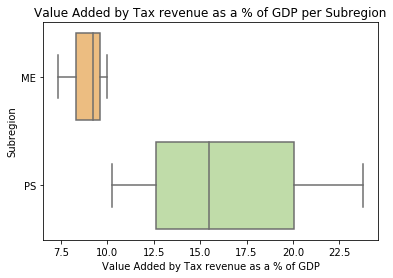

In [68]:
#Boxplots for the sources of GDP depending of the Subregion

sns.boxplot(y='Subregion', x='Industry (including construction), value added (% of GDP)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Value Added by Industry as a % of GDP per Subregion', 
            xlabel = 'Value Added by Industry as a % of GDP',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Services, value added (% of GDP)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Value Added by Services as a % of GDP per Subregion', 
            xlabel = 'Value Added by Services as a % of GDP',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Agriculture, forestry, and fishing, value added (% of GDP)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Value Added by Agriculture, forestry, and fishing as a % of GDP per Subregion', 
            xlabel = 'Value Added by Agriculture, forestry, and fishing as a % of GDP',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Merchandise trade (% of GDP)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Value Added by Merchandise trade as a % of GDP per Subregion', 
            xlabel = 'Value Added by Merchandise trade as a % of GDP',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Tax revenue (% of GDP)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Value Added by Tax revenue as a % of GDP per Subregion', 
            xlabel = 'Value Added by Tax revenue as a % of GDP',
            ylabel = 'Subregion')

plt.show()


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


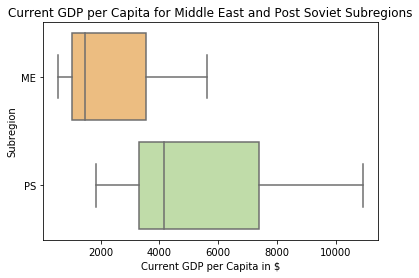

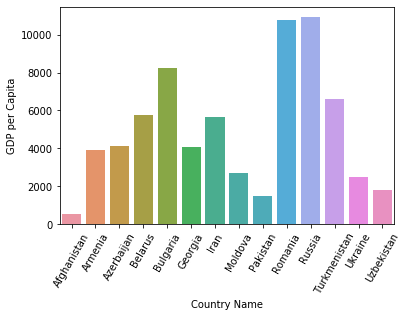

In [32]:
#Boxplot and Barplot for GDP per Capita by Subregion and by Country.

mirage_economy['GDP per Capita'] = mirage_economy['GDP (current US$)']/mirage_population['Population, total']
mirage_economy['GDP per Capita'].round(2)

sns.boxplot(y='Subregion', x='GDP per Capita',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Current GDP per Capita for Middle East and Post Soviet Subregions', 
            xlabel = 'Current GDP per Capita in $',
            ylabel = 'Subregion')

plt.show()

hivplot = sns.barplot(data=mirage_economy, x= "Country Name",
y='GDP per Capita')
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)

plt.show()

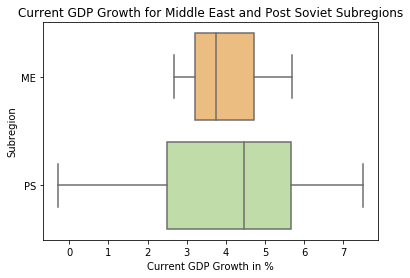

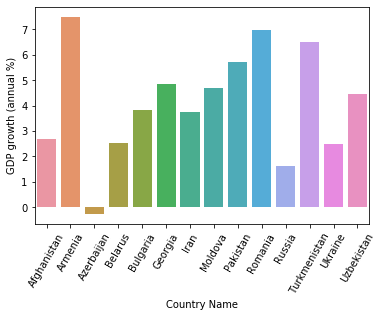

In [33]:
#Boxplot and Barplot for GDP Growth by Subregion and by Country.
sns.boxplot(y='Subregion', x='GDP growth (annual %)',
            data = mirage_economy, palette = 'Spectral')\
            .set(title = 'Current GDP Growth for Middle East and Post Soviet Subregions', 
            xlabel = 'Current GDP Growth in %',
            ylabel = 'Subregion')

plt.show()

hivplot = sns.barplot(data=mirage_economy, x= "Country Name",
y='GDP growth (annual %)')
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)

plt.show()

#### Outliers Population

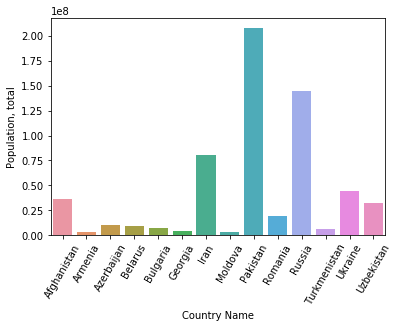

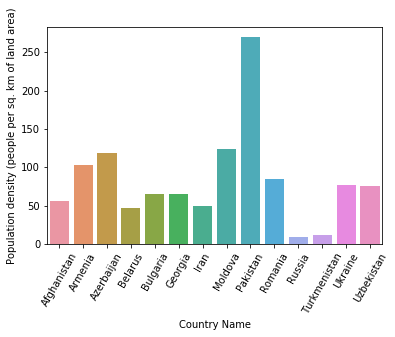

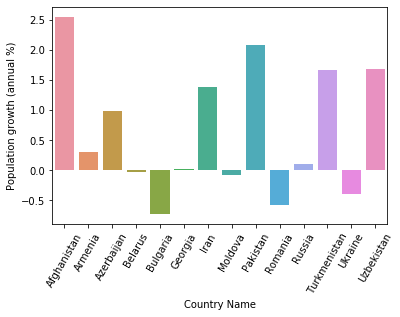

In [70]:
#Bar plot for the total population, population dencity, and population growth by country

hivplot = sns.barplot(data=mirage_population, x= "Country Name",
y='Population, total')
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)

plt.show()

hivplot = sns.barplot(data=mirage_population, x= "Country Name",
y='Population density (people per sq. km of land area)')
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)

plt.show()

hivplot = sns.barplot(data=mirage_population, x= "Country Name",
y='Population growth (annual %)')
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)

plt.show()

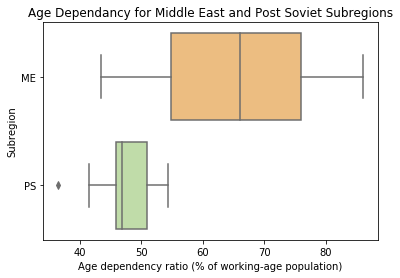

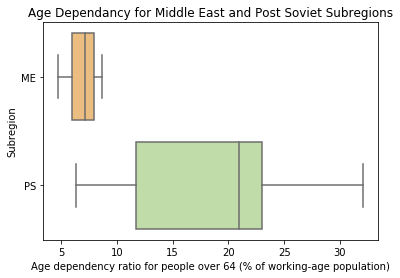

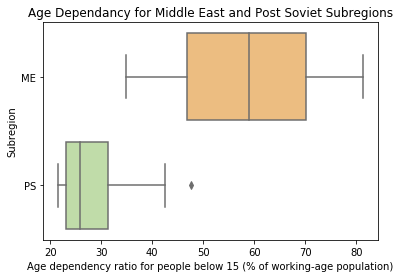

In [35]:
#Boxplots for the life dependancy
sns.boxplot(y='Subregion', x='Age dependency ratio (% of working-age population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Age Dependancy for Middle East and Post Soviet Subregions', 
            xlabel = 'Age dependency ratio (% of working-age population)',
            ylabel = 'Subregion')

plt.show()

sns.boxplot(y='Subregion', x='Age dependency ratio, old (% of working-age population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Age Dependancy for Middle East and Post Soviet Subregions', 
            xlabel = 'Age dependency ratio for people over 64 (% of working-age population)',
            ylabel = 'Subregion')

plt.show()

sns.boxplot(y='Subregion', x='Age dependency ratio, young (% of working-age population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Age Dependancy for Middle East and Post Soviet Subregions', 
            xlabel = 'Age dependency ratio for people below 15 (% of working-age population)',
            ylabel = 'Subregion')

plt.show()

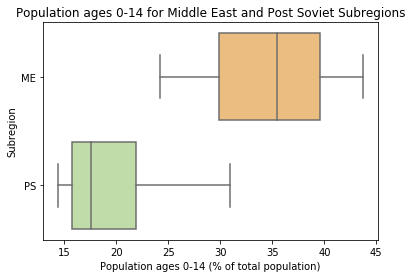

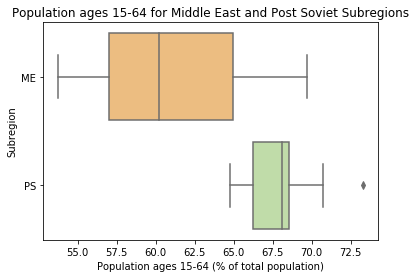

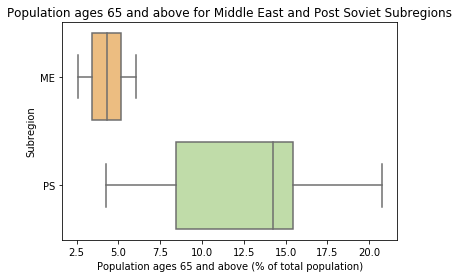

In [36]:
#Boxplots for the population ages

sns.boxplot(y='Subregion', x='Population ages 0-14 (% of total population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Population ages 0-14 for Middle East and Post Soviet Subregions', 
            xlabel = 'Population ages 0-14 (% of total population)',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Population ages 15-64 (% of total population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Population ages 15-64 for Middle East and Post Soviet Subregions', 
            xlabel = 'Population ages 15-64 (% of total population)',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Population ages 65 and above (% of total population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Population ages 65 and above for Middle East and Post Soviet Subregions', 
            xlabel = 'Population ages 65 and above (% of total population)',
            ylabel = 'Subregion')

plt.show()



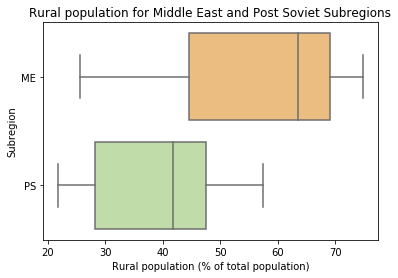

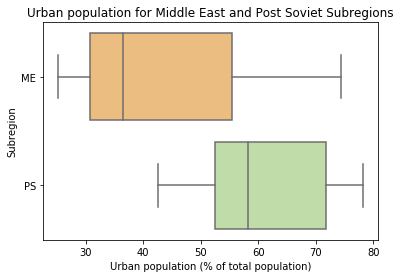

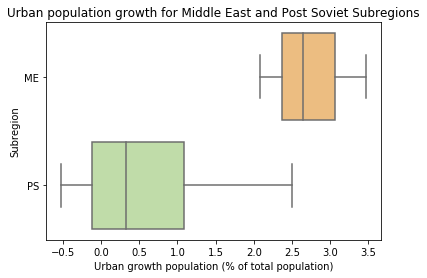

In [37]:
#Boxplots for the Urban and Rural Population

sns.boxplot(y='Subregion', x='Rural population (% of total population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Rural population for Middle East and Post Soviet Subregions', 
            xlabel = 'Rural population (% of total population)',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Urban population (% of total population)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Urban population for Middle East and Post Soviet Subregions', 
            xlabel = 'Urban population (% of total population)',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Urban population growth (annual %)',
            data = mirage_population, palette = 'Spectral')\
            .set(title = 'Urban population growth for Middle East and Post Soviet Subregions', 
            xlabel = 'Urban growth population (% of total population)',
            ylabel = 'Subregion')

plt.show()


### Heatmaps

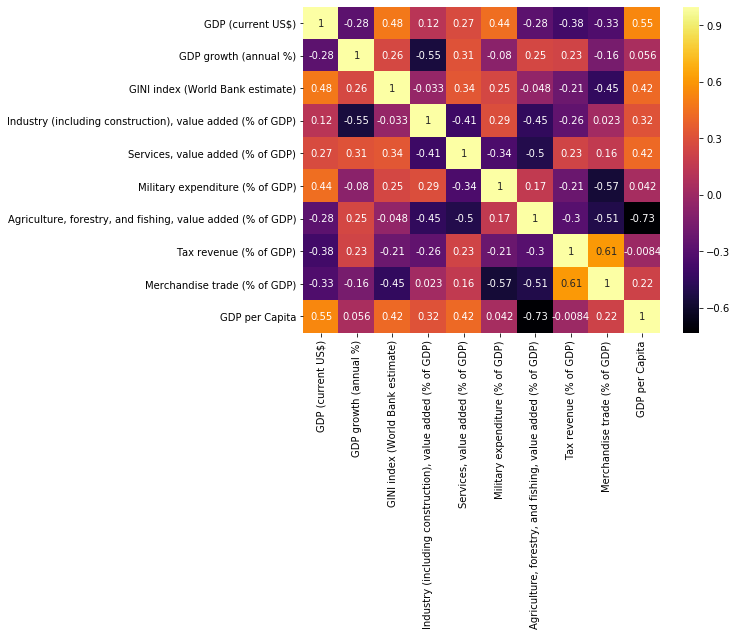

In [38]:
# Creating a correlation heat map for the Economy

mirage_economy_corr = mirage_economy.corr()

plt.subplots(figsize=(8,6))
ax = sns.heatmap(data = mirage_economy_corr, cmap = 'inferno', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

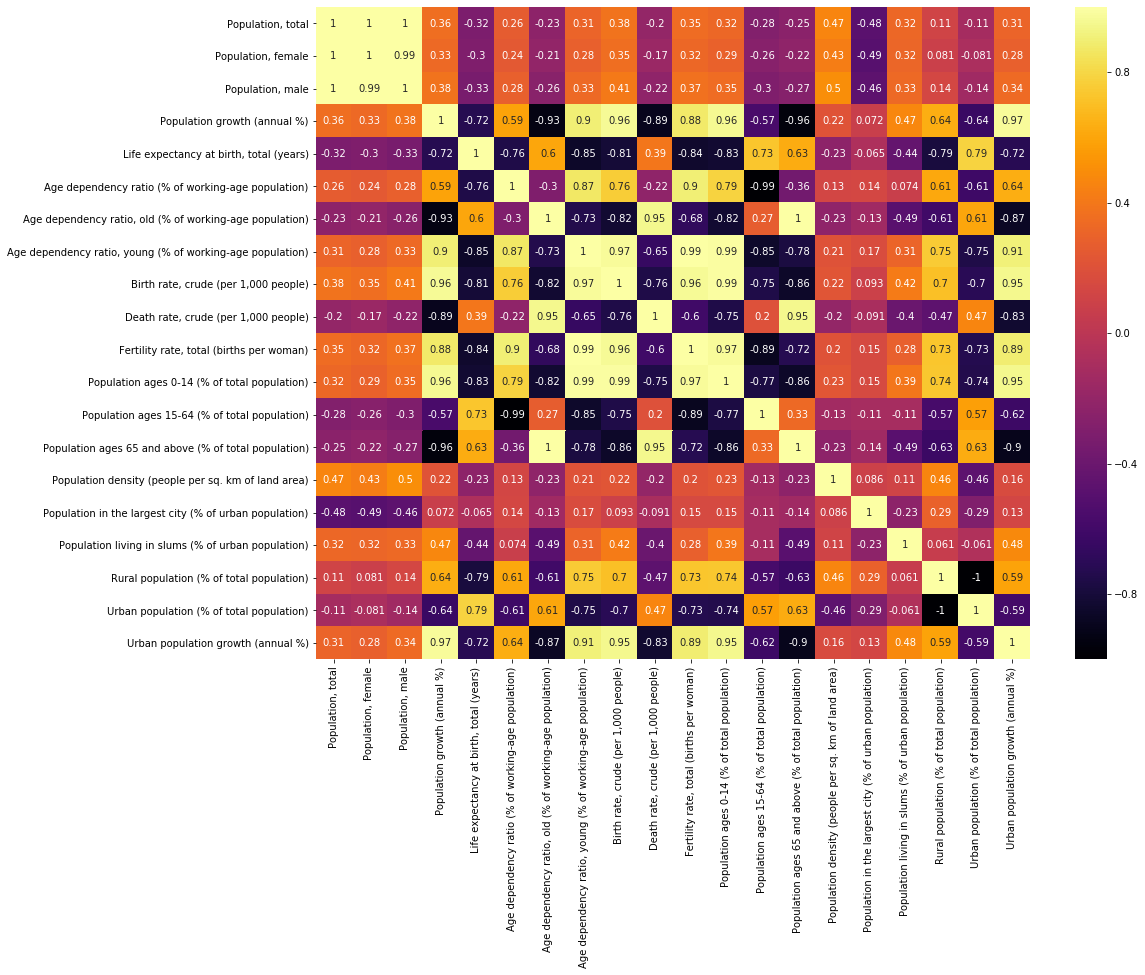

In [39]:
# Creating a correlation heat map for the Population
mirage_population_corr = mirage_population.corr()

plt.subplots(figsize=(16,12))
ax = sns.heatmap(data = mirage_population_corr, cmap = 'inferno', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

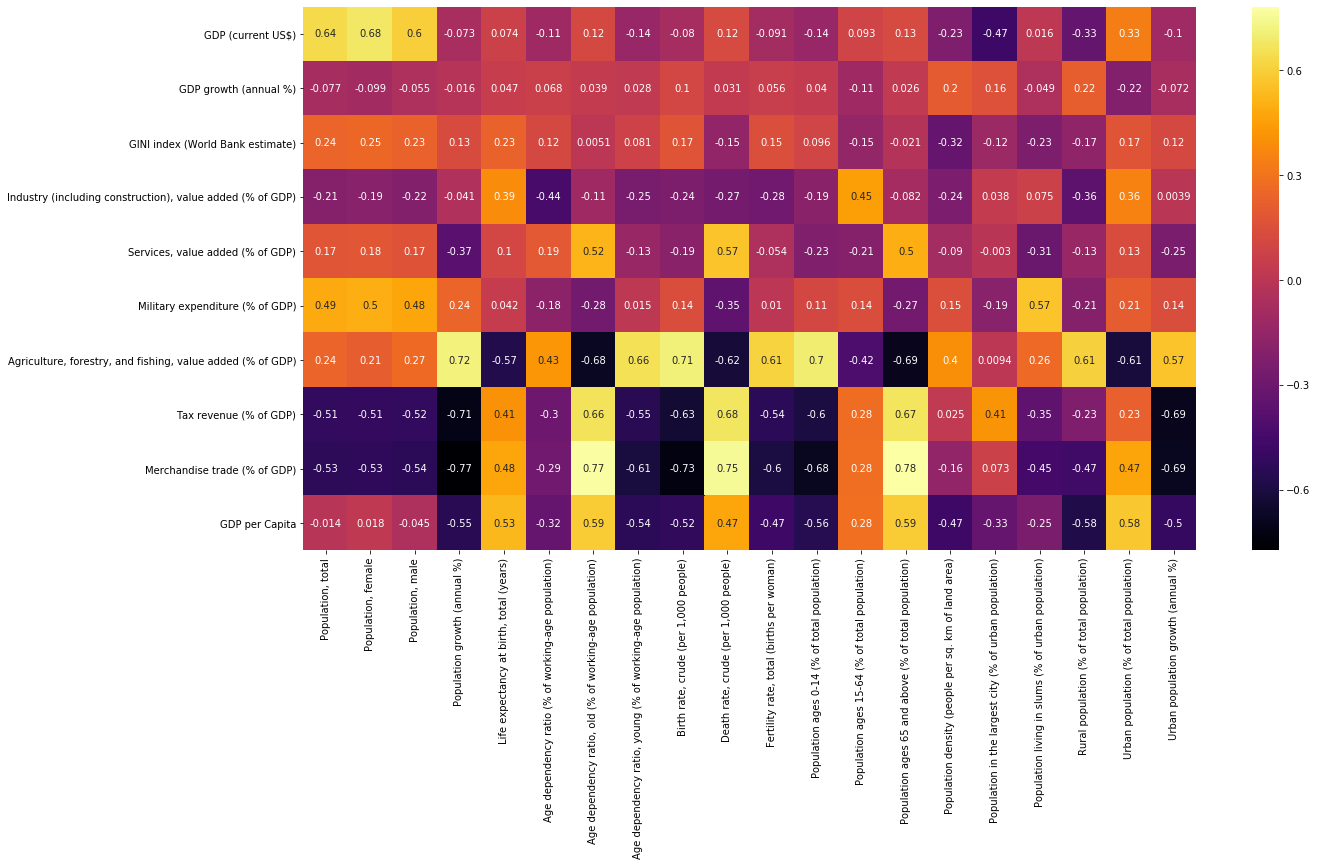

In [40]:
# Creating a correlation heat map between Economy and Population
ec_pop_corr_df = pd.DataFrame()

for col in mirage_population:
    
    if col == 'Country Name' or col == 'Subregion':
        pass
    else:
        ec_pop_corr_df[col] = mirage_economy.corrwith(mirage_population[col])
        


plt.subplots(figsize=(20,10))
ax = sns.heatmap(data = ec_pop_corr_df, cmap = 'inferno', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


### Scatter plots

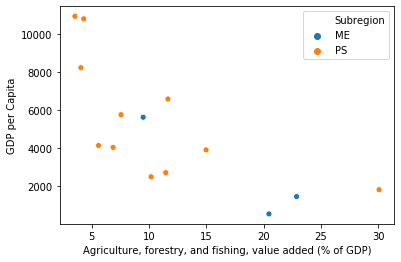

In [41]:
# Building a scatter plot for the Agriculture, forestry, and fishing vs. GDP per Capita
sns.scatterplot(x='Agriculture, forestry, and fishing, value added (% of GDP)',
                y='GDP per Capita', 
                data = mirage_economy,
                hue = 'Subregion'
               )

plt.show()

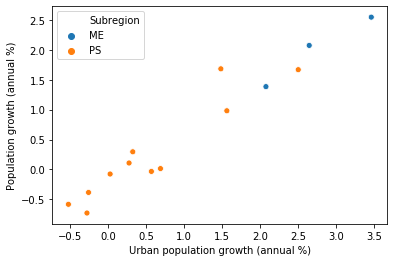

In [42]:
# Building a scatter plot for the Urban Population Growth vs. Population Growth
sns.scatterplot(x='Urban population growth (annual %)',
                y='Population growth (annual %)', 
                data = mirage_population,
                hue = 'Subregion'
               )

plt.show()

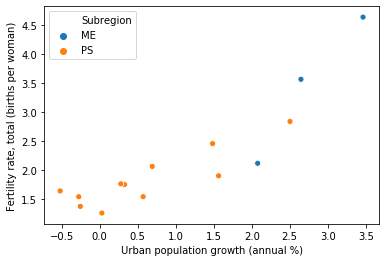

In [43]:
# Building a scatter plot for the Urban Population Growth vs. Total Fertility
sns.scatterplot(x='Urban population growth (annual %)',
                y='Fertility rate, total (births per woman)', 
                data = mirage_population,
                hue = 'Subregion'
               )

plt.show()

## Data Analysis (Abdul - Health & Infrastructure)

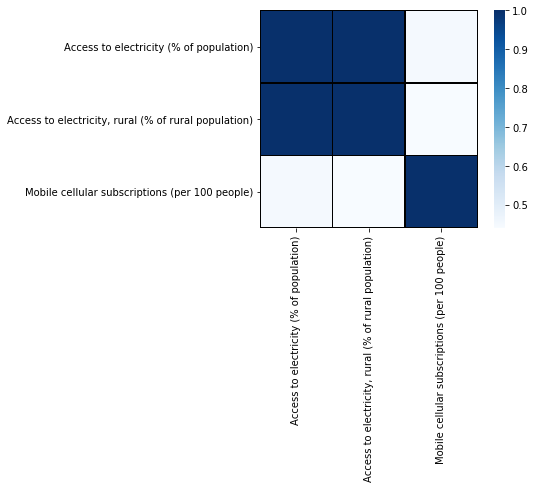

In [44]:
#Testing correlation plot for subtopic - Infrastructure (NOT USED IN PRESENTAION)

mirage_corr = mirage_infrastructure.corr().round(2)

sns.heatmap(data       = mirage_corr,
            cmap       = 'Blues',
            square     = True,
            annot      = False,
            linecolor  = 'black',
            linewidths = 0.5)

bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)

plt.show()

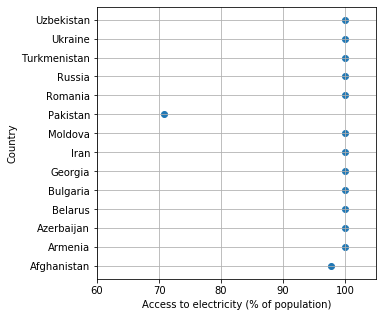

In [45]:
#Access to electricity in the region

#Plotting scatter plot

x = 'Access to electricity (% of population)'
y='Country Name'
limit=0

plt.subplots(figsize=(5,5))
plt.scatter(x , y,data=mirage_filtered)

#adding grid lines    
plt.grid(True) 
plt.axvline(x=limit,
           color='navy',
            linestyle = '--')

#Changing x range 
plt.xlim(60,)

plt.ylabel ("Country")
plt.xlabel("Access to electricity (% of population)")
plt.savefig('Access to electricity (% of population)',dpi = 100, bbox_inches='tight')
plt.show()

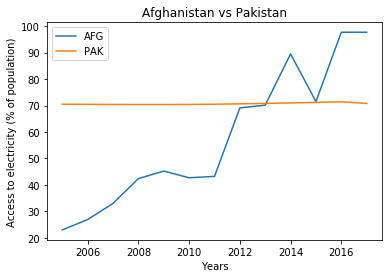

In [46]:
# Acces to electricity Pakistan vs Afghanistan over time
#Source: https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS?locations=AF

Dataset_elec = pd.read_excel(file, 'Afgan elec')

year = Dataset_elec['Year']  
afg = Dataset_elec['AFG']
pak = Dataset_elec['PAK']

plt.xlabel('Years') 
plt.ylabel('Access to electricity (% of population)') 
plt.title('Afghanistan vs Pakistan')

plt.plot(year, afg, label = 'AFG')
plt.plot(year, pak, label = 'PAK')
plt.legend()
plt.savefig("Afg_Pak_elect.png")
plt.show()



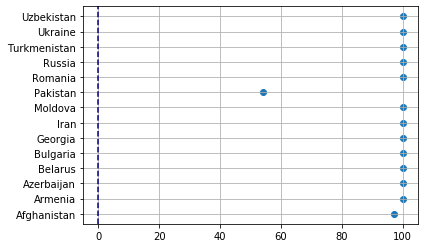

In [47]:
#Access to electricity rural 

#Plotting scatter plot
x = 'Access to electricity, rural (% of rural population)'
y='Country Name'
limit=0
plt.scatter(x , y,data=mirage_filtered)

            
plt.grid(True) 
plt.axvline(x=limit,
           color='navy',
           linestyle = '--')

plt.savefig('Access to electricity, rural (% of rural population)',dpi = 100, bbox_inches='tight')
plt.show()

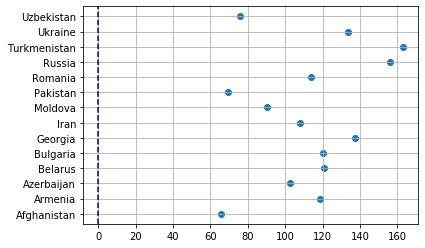

In [48]:
#Looking at mobile cellular subscriptions (story to tell but not too interesting)

#Plotting scatter plot
x = 'Mobile cellular subscriptions (per 100 people)'
y='Country Name'
limit=0

plt.scatter(x , y,data=mirage_filtered)

#adding grid line        
plt.grid(True) 
plt.axvline(x=limit,
           color='navy',
           linestyle = '--')

plt.savefig('Mobile cellular subscriptions (per 100 people)',dpi = 100, bbox_inches='tight')
plt.show()

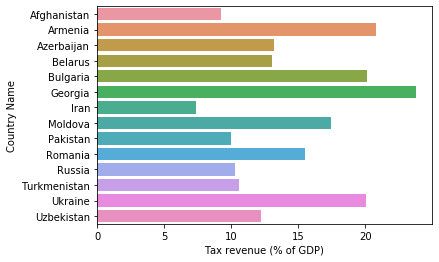

In [49]:
# Looking at tax revenue

sns.barplot(data=mirage_filtered, x="Tax revenue (% of GDP)",
y="Country Name")
plt.savefig('taxrevenue')

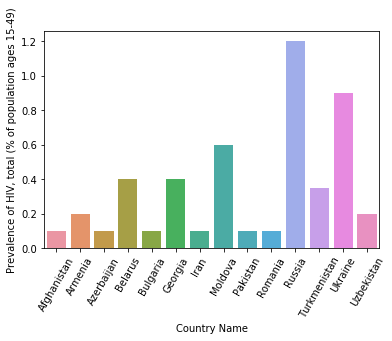

In [50]:
#HIV plot 
hivplot = sns.barplot(data=mirage_filtered, x= "Country Name",
y="Prevalence of HIV, total (% of population ages 15-49)")

#changing the label angle
hivplot.set_xticklabels(hivplot.get_xticklabels(),rotation=60)
plt.savefig('HIVplot')

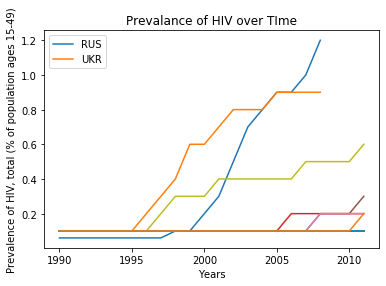

In [69]:
#Prevelance of HIV over time 
#https://data.worldbank.org/indicator/SH.DYN.AIDS.ZS
#http://www.aidsinfoonline.org

#Reading new sheet in excel
HIV_overtime = pd.read_excel(file, 'HIV over time')


#Defining year and countries 
year = HIV_overtime['Year']  
RUS = HIV_overtime['RUS']
UKR = HIV_overtime['UKR']
AFG = HIV_overtime['AFG']
ARM = HIV_overtime['ARM']
BGR = HIV_overtime['BGR']
BLR = HIV_overtime['BLR']
GEO = HIV_overtime['GEO']
IRN = HIV_overtime['IRN']
MDA = HIV_overtime['MDA']
PAK = HIV_overtime['PAK']
ROU = HIV_overtime['ROU']
UZB = HIV_overtime['UZB']


#setting labels and title
plt.xlabel('Years') 
plt.ylabel('Prevalence of HIV, total (% of population ages 15-49)') 
plt.title('Prevalance of HIV over TIme')

#Creating plots for each country
plt.plot(year, RUS, label = 'RUS')
plt.plot(year, UKR, label = 'UKR')
plt.plot(year, AFG)
plt.plot(year, ARM)
plt.plot(year, BGR)
plt.plot(year, BLR)
plt.plot(year, GEO)
plt.plot(year, IRN)
plt.plot(year, MDA)
plt.plot(year, PAK)
plt.plot(year, ROU)
plt.plot(year, UZB)

plt.legend()
plt.savefig("HIV over time.png")
plt.show()

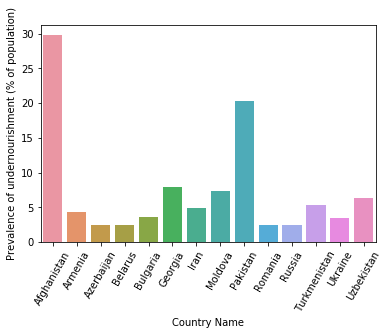

In [51]:
#Taking a look at undernourishment (Not used in presentation)
undernourishment = sns.barplot(data=mirage_filtered, x= "Country Name",
y='Prevalence of undernourishment (% of population)')

#changing the label angle
undernourishment.set_xticklabels(undernourishment.get_xticklabels(),rotation=60)
plt.savefig('undernourishment')

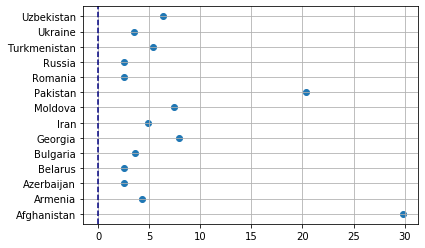

In [52]:
#Taking a look at undernourishment (Not used in presentation)

#Plotting scatter plot
x = 'Prevalence of undernourishment (% of population)'
y='Country Name'
limit=0
plt.scatter(x , y,data=mirage_filtered)


#adding grids
plt.grid(True) 
plt.axvline(x=limit,
           color='navy',
           linestyle = '--')

plt.savefig('Prevalence of undernourishment (% of population)',dpi = 100, bbox_inches='tight')
plt.show()

## Data Analysis (Edgar - Education)

In [53]:
#Reading historical information about female and male literacy from Iran 
#Source: https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS
#Source: https://data.worldbank.org/indicator/SE.ADT.LITR.MA.ZS?view=chart


Dataset_Male = pd.read_excel(file, 'WB_Literacymale')
Dataset_Female = pd.read_excel(file, 'WB_Literacyfemale')

In [54]:
# Looking into GDP per capita vs Education 

#Creating DataFrame for our variables
Dataset_Mirage_GDP_Literacy = mirage_filtered.loc[:,['GDP (current US$)','Literacy rate, adult total (% of people ages 15 and above)','Population, total']]
GDPperCapita = round(mirage_filtered['GDP (current US$)'] / mirage_filtered['Population, total'],2)
Dataset_Mirage_GDP_Literacy['GDP per Capita'] = GDPperCapita 

#Formating 
Dataset_Mirage_GDP_Literacy[['GDP (current US$)']] = round(Dataset_Mirage_GDP_Literacy[['GDP (current US$)']] / 1000000000,2)
Dataset_Mirage_GDP_Literacy[['Population, total']] = round(Dataset_Mirage_GDP_Literacy[['Population, total']] / 1000000,2)

#Formating column names
Dataset_Mirage_GDP_Literacy.columns = ['GDP (USD BN)','Literacy (%)','Total Population (M)','GDP per capita']

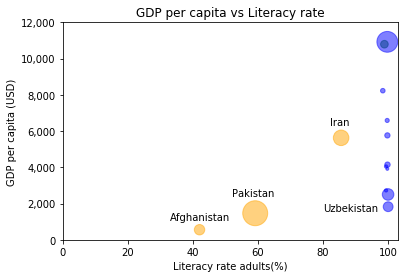

In [55]:
# Plotting the graph 
lit = Dataset_Mirage_GDP_Literacy[['Literacy (%)']] 
gdp = Dataset_Mirage_GDP_Literacy[['GDP per capita']]  
pop = Dataset_Mirage_GDP_Literacy[['Total Population (M)']]
  
np_pop = np.array(pop)
np_pop = np_pop * 3
plt.scatter(lit, gdp, s = np_pop, color = ['orange','blue','blue','blue','blue','blue','orange','blue','orange','green','blue','blue','blue','blue'],alpha = 0.5)

plt.xlabel('Literacy rate adults(%)') 
plt.ylabel('GDP per capita (USD)') 
plt.title('GDP per capita vs Literacy rate') 
plt.xticks([0,20,40,60,80,100])
#plt.yticks([0,400,800,1200,1600],['0','400B','800B','1200B','1600B'])
plt.yticks([0,2000,4000,6000,8000,10000,12000],['0','2,000','4,000','6,000','8,000','10,000','12,000'])
plt.text(33, 1100, 'Afghanistan')
plt.text(52, 2400, 'Pakistan')
plt.text(80, 1600, 'Uzbekistan')
plt.text(82, 6300, 'Iran')
plt.savefig("GDPPC_Literacy 01.png")

#plt.tight_layout()
plt.show() 

# 3 outliers, talk about afghanistan history and Iran

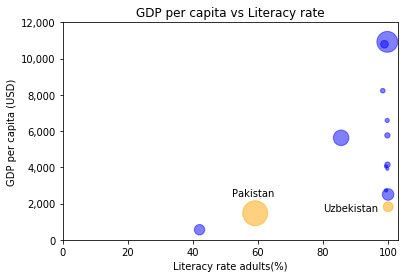

In [56]:
# Plotting the graph 
lit = Dataset_Mirage_GDP_Literacy[['Literacy (%)']] 
gdp = Dataset_Mirage_GDP_Literacy[['GDP per capita']]  
pop = Dataset_Mirage_GDP_Literacy[['Total Population (M)']]
  
np_pop = np.array(pop)
np_pop = np_pop * 3
plt.scatter(lit, gdp, s = np_pop, color = ['blue','blue','blue','blue','blue','blue','blue','blue','orange','blue','blue','blue','blue','orange'],alpha = 0.5)
# plt.scatter(lit, gdp, s = np_pop)

plt.xlabel('Literacy rate adults(%)') 
plt.ylabel('GDP per capita (USD)') 
plt.title('GDP per capita vs Literacy rate') 
plt.xticks([0,20,40,60,80,100])
plt.yticks([0,2000,4000,6000,8000,10000,12000],['0','2,000','4,000','6,000','8,000','10,000','12,000'])
plt.text(52, 2400, 'Pakistan')
plt.text(80, 1600, 'Uzbekistan')
plt.savefig("GDPPC_Literacy 02.png")

plt.show() 

# Pakistan vs uzbekistan, why same gdp but different education

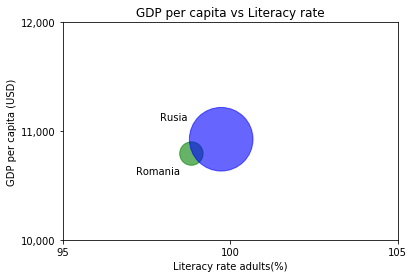

In [57]:
# Plotting the graph 
lit = Dataset_Mirage_GDP_Literacy.loc[['ROU','RUS'],'Literacy (%)'] 
gdp = Dataset_Mirage_GDP_Literacy.loc[['ROU','RUS'],'GDP per capita']   
pop = Dataset_Mirage_GDP_Literacy.loc[['ROU','RUS'],'Total Population (M)'] 

np_pop = np.array(pop)
np_pop = np_pop * 28
plt.scatter(lit, gdp, s = np_pop, color = ['green','blue'],alpha = 0.6)

plt.xlabel('Literacy rate adults(%)') 
plt.ylabel('GDP per capita (USD)') 
plt.title('GDP per capita vs Literacy rate') 
plt.xticks([95,100,105])
plt.yticks([10000,11000,12000],['10,000','11,000','12,000'])
plt.text(97.2, 10600, 'Romania')
plt.text(97.9, 11100, 'Rusia')
plt.savefig("GDPPC_Literacy 03.png")

#plt.tight_layout()
plt.show() 

# Finally, Romania and Rusia have similar GDP. Rusia has 70 times Romania population and GDP same proportion

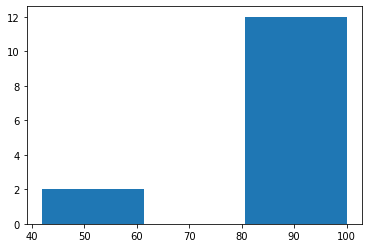

In [58]:
# Understanding how Literacy is distributed
lit = Dataset_Mirage_GDP_Literacy['Literacy (%)']
plt.hist(lit, bins = 3)
plt.show()

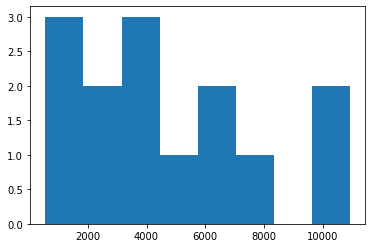

In [59]:
# Understanding how GDP is distributed
gdp = Dataset_Mirage_GDP_Literacy['GDP per capita']
plt.hist(gdp,bins = 8)
plt.show()

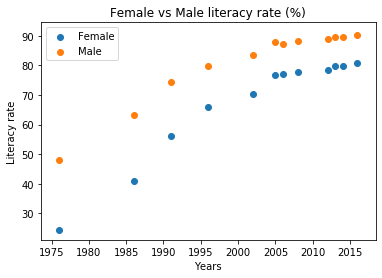

In [60]:
# Uploading and plotting historical information about literacy
year = Dataset_Male['Year']  
lit_fem = Dataset_Female['Literacy rate, adult female (% of females ages 15 and above)'] 
lit_male = Dataset_Male['Literacy rate, adult male (% of males ages 15 and above)'] 

plt.xlabel('Years') 
plt.ylabel('Literacy rate') 
plt.title('Female vs Male literacy rate (%)')

plt.scatter(year, lit_fem, label = 'Female')
plt.scatter(year, lit_male, label = 'Male')
plt.legend()
plt.savefig("Female vs Male literacy rate.png")
plt.show()

## Data Analysis (Chandan - Employment)

In [61]:
# Employment Information Check

mirage_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, AFG to UZB
Data columns (total 6 columns):
Country Name                                                                14 non-null object
Armed forces personnel (% of total labor force)                             14 non-null float64
Employment in agriculture (% of total employment) (modeled ILO estimate)    14 non-null float64
Employment in industry (% of total employment) (modeled ILO estimate)       14 non-null float64
Employment in services (% of total employment) (modeled ILO estimate)       14 non-null float64
Subregion                                                                   14 non-null category
dtypes: category(1), float64(4), object(1)
memory usage: 1.4+ KB


In [62]:
# Describing employment information
mirage_employment.describe()

,Armed forces personnel (% of total labor force),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate)
count,14.000000,14.000000,14.000000,14.000000
mean,1.690973,25.845715,24.218714,49.935286
std,0.877957,12.924801,7.331295,9.643856
min,0.448868,5.902000,13.171000,34.411999
25%,1.291767,15.952000,16.848001,43.719999
50%,1.533354,27.640501,25.633500,49.830000
75%,2.051184,35.642249,30.211750,56.655250
max,3.567089,43.124001,33.696999,67.128998


In [63]:
# Displaying all column and 5 rows
mirage_employment.head()

,Country Name,Armed forces personnel (% of total labor force),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Subregion
Country Code,,,,,,
AFG,Afghanistan,2.398332,38.773998,17.457001,43.768002,ME
ARM,Armenia,3.567089,33.442001,15.768000,50.790001,PS
AZE,Azerbaijan,1.629629,36.349998,14.370000,49.279999,PS
BLR,Belarus,3.062432,10.696000,30.768000,58.535000,PS
BGR,Bulgaria,0.923333,7.014000,29.899000,63.087002,PS


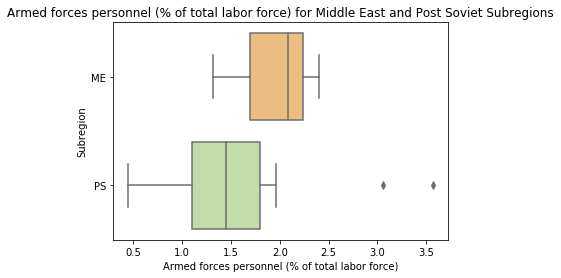

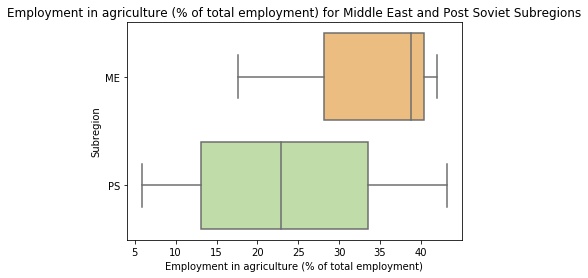

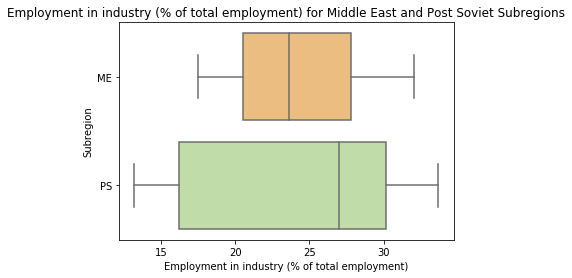

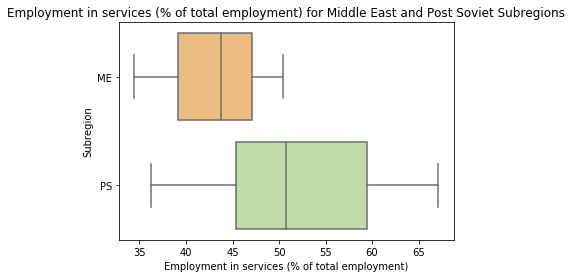

In [64]:
# Boxplot and Outlier detection
sns.boxplot(y='Subregion', x='Armed forces personnel (% of total labor force)',
            data = mirage_employment, palette = 'Spectral')\
            .set(title = 'Armed forces personnel (% of total labor force) for Middle East and Post Soviet Subregions', 
            xlabel = 'Armed forces personnel (% of total labor force)',
            ylabel = 'Subregion')

plt.show()


sns.boxplot(y='Subregion', x='Employment in agriculture (% of total employment) (modeled ILO estimate)',
            data = mirage_employment, palette = 'Spectral')\
            .set(title = 'Employment in agriculture (% of total employment) for Middle East and Post Soviet Subregions', 
            xlabel = 'Employment in agriculture (% of total employment)',
            ylabel = 'Subregion')

plt.show()

sns.boxplot(y='Subregion', x='Employment in industry (% of total employment) (modeled ILO estimate)',
            data = mirage_employment, palette = 'Spectral')\
            .set(title = 'Employment in industry (% of total employment) for Middle East and Post Soviet Subregions', 
            xlabel = 'Employment in industry (% of total employment)',
            ylabel = 'Subregion')

plt.show()

sns.boxplot(y='Subregion', x='Employment in services (% of total employment) (modeled ILO estimate)',
            data = mirage_employment, palette = 'Spectral')\
            .set(title = 'Employment in services (% of total employment) for Middle East and Post Soviet Subregions', 
            xlabel = 'Employment in services (% of total employment)',
            ylabel = 'Subregion')

plt.show()

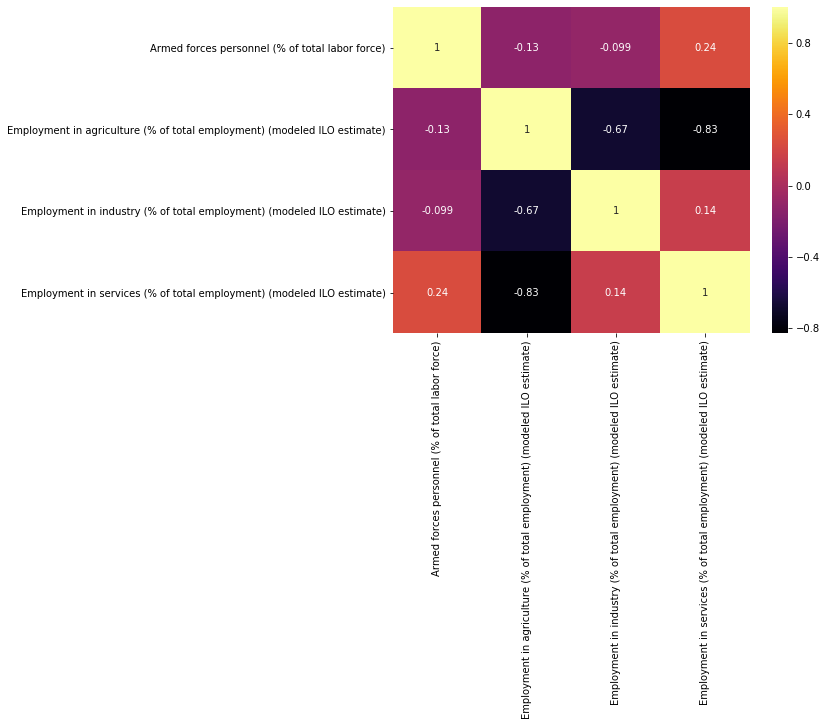

In [65]:
# Employment Correlation Heat Map

mirage_employment_corr = mirage_employment.corr()

plt.subplots(figsize=(8,6))
ax = sns.heatmap(data = mirage_employment_corr, cmap = 'inferno', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

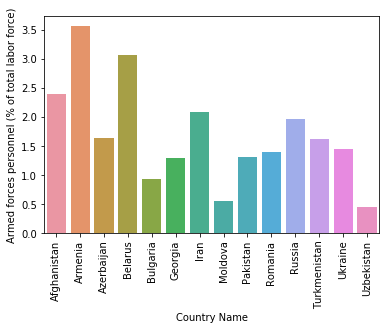

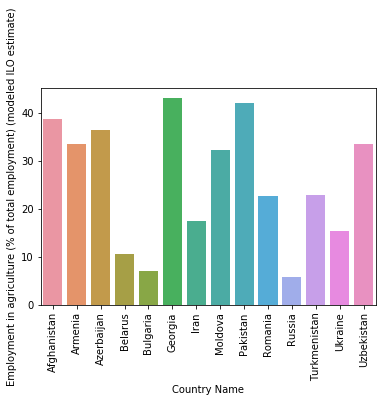

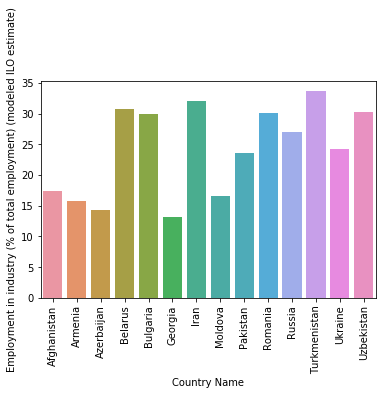

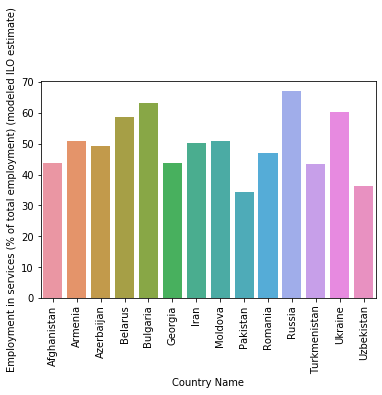

In [66]:
# Barplot Countries versus employment
armyplot = sns.barplot(data=mirage_employment, x= "Country Name",
y='Armed forces personnel (% of total labor force)')
armyplot.set_xticklabels(armyplot.get_xticklabels(),rotation=90)

plt.show()


agriplot = sns.barplot(data=mirage_employment, x= "Country Name",
y='Employment in agriculture (% of total employment) (modeled ILO estimate)')
agriplot.set_xticklabels(agriplot.get_xticklabels(),rotation=90)

plt.show()


inplot = sns.barplot(data=mirage_employment, x= "Country Name",
y='Employment in industry (% of total employment) (modeled ILO estimate)')
inplot.set_xticklabels(inplot.get_xticklabels(),rotation=90)

plt.show()


serplot = sns.barplot(data=mirage_employment, x= "Country Name",
y='Employment in services (% of total employment) (modeled ILO estimate)')
serplot.set_xticklabels(serplot.get_xticklabels(),rotation=90)

plt.show()